##**Convolutional Neural Network (CNN)**

In neural networks, Convolutional Neural Network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

In this example, we will use a classic dataset of images classifications named [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Here we have the classes in the dataset, as well as 10 random images from each:



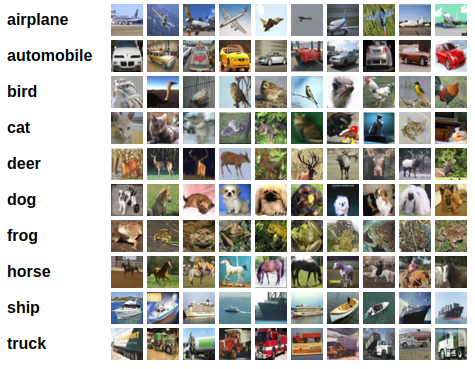


###**Hands on**

In [1]:
# Adding libraries 
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


TensorFlow 2.x selected.


### Now, we will define the batch size and the number of epochs. What is the difference between them?


The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.


## Hyperparameter


In [0]:
batch_size = 32 
epochs = 5 

## Constants


In [0]:
num_classes = 10 #number of class cifar
input_shape=(32, 32, 3) #32x32 input data size (images) over 3 channels (height x width x RGB)

## Importing the CIFAR 10 dataset 
Class:
                                                           
0 airplane                                                                                    
1 automobile									
2 bird									
3 cat								
4 deer										
5 dog										
6 frog										
7 horse									
8 ship										
9 truck	

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


# CNN Model




In [0]:
model = Sequential() 

##### Input Layer


In [0]:
 #Adding a convolution layer composed of 32 neurons, active Relu activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

Hidden Layer


In [0]:
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #adding the MaxPooling2D layer. Example transforms a 4x4 image to 2x2

model.add(Dropout(0.20))#regulation layer, which avoids overfitting (ability of the model to adapt to details and not generalize the model well)

model.add(Flatten()) #Flatten reduces image size, for example, transforms an image from 1012K to 379K

model.add(Dense(1024, activation='relu')) #Fully connected 1024 neuron layer and Relu activation

Output Layer


In [0]:
model.add(Dense(num_classes,activation='softmax')) # Output layer, where there are the number of neurons equivalent to the number of problem classes and softmax activation (multiclasses)

### Summary




In [9]:
model.summary () #Responsible for summarizing the layers added in Model and the output dimension of each one and number of generated parameters


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        5780      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3920)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4015104   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Compile


In [0]:
# Load model into memory using categorical_crossentropy, Adam optimizer with lr learning rate, and as metrics accuracia
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['accuracy'])

## Training

In [11]:
## Train model and validate test data
#verbose = 1, available: 0, 1, 2 - test others to see how they behave
model.fit(X_train / 255.0, to_categorical(Y_train),
            batch_size=128,
            verbose=1,
            epochs=epochs,
            validation_data=(X_test / 255.0, to_categorical(Y_test)))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 219us/sample - loss: 1.7157 - accuracy: 0.3917 - val_loss: 1.5040 - val_accuracy: 0.4629
Epoch 2/5
50000/50000 [==============================] - 6s 129us/sample - loss: 1.4116 - accuracy: 0.5024 - val_loss: 1.3384 - val_accuracy: 0.5235
Epoch 3/5
50000/50000 [==============================] - 6s 130us/sample - loss: 1.3028 - accuracy: 0.5432 - val_loss: 1.2738 - val_accuracy: 0.5458
Epoch 4/5
50000/50000 [==============================] - 7s 131us/sample - loss: 1.2292 - accuracy: 0.5685 - val_loss: 1.2243 - val_accuracy: 0.5664
Epoch 5/5
50000/50000 [==============================] - 7s 135us/sample - loss: 1.1758 - accuracy: 0.5909 - val_loss: 1.1904 - val_accuracy: 0.5827


## Evaluate 


In [12]:
scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
print("Loss:",scores[0],"Accuracy:",scores[1])

Loss: 1.190357371520996 Accuracy: 0.5827


## Predict 


In [0]:
Y_pred = model.predict(X_test / 255.0,batch_size=128)

## Looking Results

#### Can I see if my classifier did this correctly?
#### Let's see image 279. Try others to see the results


In [15]:
print ('Class',Y_pred[279])
print ('y_test',Y_test[279])
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Class [1.03421284e-04 9.34406416e-05 8.02476704e-03 9.23577249e-02
 1.87770389e-02 6.02439284e-01 2.65630130e-02 2.50482023e-01
 4.70385276e-05 1.11221184e-03]
y_test [3]
Loss: 1.190
Accuracy: 0.583


### Why did example 279 generate this output? Considering this output, why was class 3 chosen?

[0.0013623  0.0055059  0.05603503 0.06772233 0.02224177 0.22798161
 0.1038978  0.46970132 0.00058469 0.04496735]

### It's better looking the image


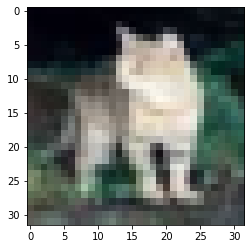

In [16]:
plt.imshow(X_test[279])
plt.show()

# Homework 

 Given the training and test data, build a CNN model on Google Colab using [MNIST database](https://keras.io/datasets/)


```
from tensorflow.keras.datasets import mnist

batch_size = 128
num_classes = 10
epochs = 5

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#places images in the right shape

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#pixels between 0 e 1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#one hot encoding 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

```



##Some References and Additional Readings

* Keras: The Python Deep Learning library
 [Keras Framework](https://keras.io/)

* Christopher Olah Blog's [Understanding Convolutions](https://colah.github.io/posts/2014-07-Understanding-Convolutions/)

* Blandon [How do convolutional neural networks work?](http://brohrer.github.io/how_convolutional_neural_networks_work.html)

*  CS231n: Convolutional Neural Networks for Visual Recognition.  [CS231n course](https://cs231n.github.io/) 

* Feature Visualization [Building blocks of interpretability](https://distill.pub/2018/building-blocks/) 

* What are Convolutional Neural Networks?
 [Understanding Convolutional Neural Networks for NLP
](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/)

* Machine Learning Mastery [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
